# Explore here

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/workspaces/Loic-Deep-Learning/dogs-vs-cats/train/'
test_dir = '/workspaces/Loic-Deep-Learning/dogs-vs-cats/test/'

datagen_train = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

datagen_test = ImageDataGenerator(rescale=1./255)

test_generator = datagen_test.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

2025-05-14 17:07:35.248309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-14 17:07:35.281132: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 17:07:35.512895: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 17:07:35.694538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747242455.995145     840 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747242456.06

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-14 17:07:40.040718: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    34,669,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,762,817 (132.61 MB)

 Trainable params: 34,762,817 (132.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_generator,
    epochs=10,
    verbose=1,
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 716s 916ms/step - accuracy: 0.7828 - loss: 0.4670
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 700s 895ms/step - accuracy: 0.8209 - loss: 0.3961
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 694s 887ms/step - accuracy: 0.8723 - loss: 0.3011
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 684s 875ms/step - accuracy: 0.9182 - loss: 0.2087
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 725s 853ms/step - accuracy: 0.9567 - loss: 0.1156
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 660s 844ms/step - accuracy: 0.9746 - loss: 0.0738
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 656s 839ms/step - accuracy: 0.9830 - loss: 0.0487
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 656s 839ms/step - accuracy: 0.9865 - loss: 0.0468
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 649s 829ms/step - accuracy: 0.9885 - loss: 0.0390
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 644s 823ms/step - accuracy: 0.9895 - loss: 0.0334


El model aprende casi a la perfccion de los datos de entrenamiento. En este caso val_accuracy y val_loss no tienen sentido dado que las imagenes de test no estan clasificadas por lo que no puede comprobar si realmente esta acertando o no. Se podria conseguir un metrica real dividiendo las imagenes de train en train y test ya que si estan clasificadas. En este caso la verificacion sera visual, observando la imagen en cuestion. 

In [9]:
predictions = model.predict(test_generator, verbose=1)

391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 213ms/step


In [10]:
predicted_classes = (predictions > 0.5).astype('int32') 

In [11]:
filenames = test_generator.filenames
filenames = [f.split("/")[-1] for f in filenames]

In [20]:
import random
import matplotlib.image as mpimg
import tensorflow as tf


def show_random_predictions(model, generator, class_names=('Cat', 'Dog'), num_images=10):
    total_images = len(generator.filenames)
    if total_images == 0:
        print("⚠ No se encontraron imágenes en el generador.")
        return
    
    indices = random.sample(range(total_images), num_images)
    file_paths = [generator.filepaths[i] for i in indices]

    plt.figure(figsize=(15, 6))

    for i, path in enumerate(file_paths):
        # Cargar imagen desde el generador (ya está escalada y preprocesada según las transformaciones)
        img = tf.keras.preprocessing.image.load_img(path, target_size=generator.target_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        
        # Realizar predicción
        prediction = model.predict(np.expand_dims(img_array, axis=0))[0][0]
        label = class_names[int(prediction > 0.5)]

        plt.subplot(2, 5, i + 1)
        plt.imshow(img_array)
        plt.title(f"{label} ({prediction:.2f})", fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


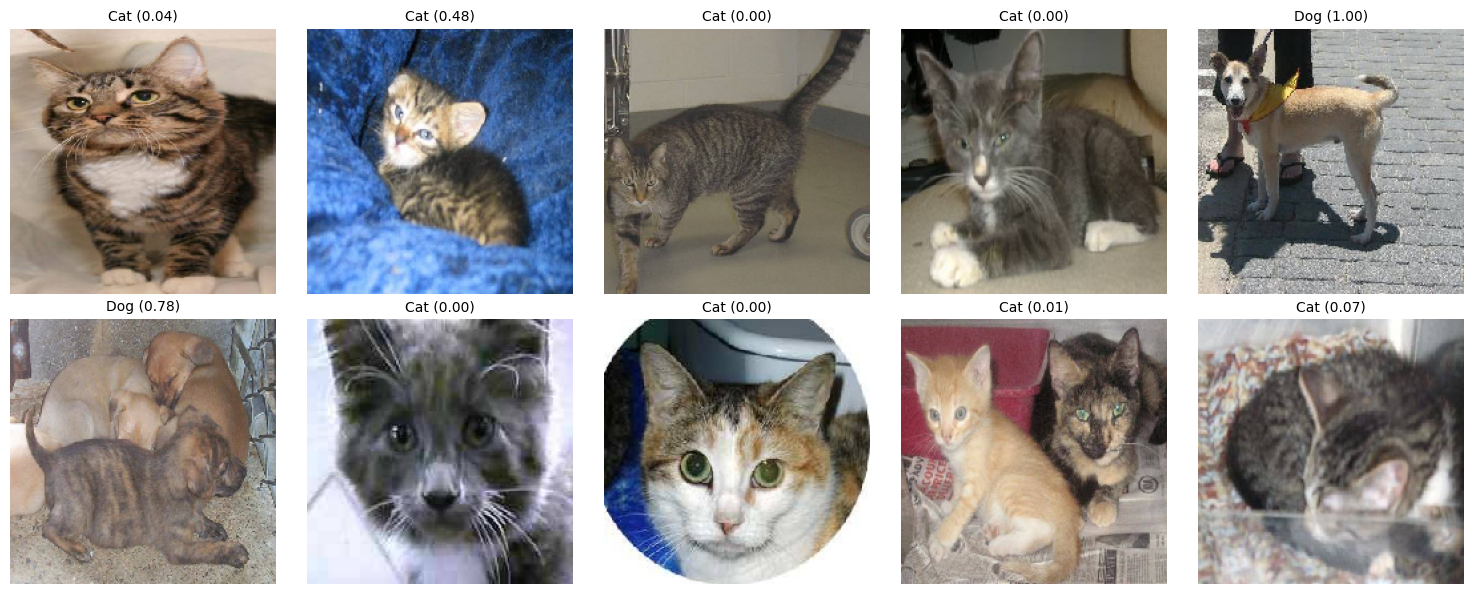

In [29]:
show_random_predictions(model, test_generator)

"En este caso, y basandonos unicamente en accuracy, el modelo actual ya tiene una metrica del ~99% por lo que la optimizacion seria dificil, redundante y con un coste computacional mayor. No obstante una posible forma de optimizacion seria la siguiente:"

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    'mejor_modelo.h5', 
    monitor='accuracy', 
    save_best_only=True, 
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='loss', 
    patience=5, 
    restore_best_weights=True,
    verbose=1
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stop]
)

In [ ]:
from tensorflow.keras.models import load_model

mejor_modelo = load_model('mejor_modelo.h5')

In [ ]:
predicciones = mejor_modelo.predict(test_generator, verbose=1)

In [ ]:
predicciones_clases = (predicciones > 0.5).astype('int32')

In [ ]:
filenames = test_generator.filenames
filenames = [f.split("/")[-1] for f in filenames]

In [ ]:
results = pd.DataFrame({
    "id": [int(fname.split('.')[0]) for fname in filenames],
    "label": predicted_classes.flatten()
})

results